In [97]:
using Plots, BenchmarkTools, LinearAlgebra, LaTeXStrings

In [95]:
function ode_euler(
    fp::Vector{<:Function}, 
    t0::Real, 
    x0::Vector{<:Real}, 
    Npoints::Integer, 
    h = 1.0e-6)
    
    tn = t0 .+ collect(0:1:(Npoints-1)) * h
    xn = zeros((length(x0), length(tn)))
    xn[:,1] = x0
    for i in 1:(Npoints-1)
        xn[:, i+1] = xn[:, i] .+ [f(t) for (f, t) ∈ zip(fp, tn[i])] .* h
    end
    return tn, xn
end

ode_euler (generic function with 8 methods)

In [100]:
tn, xn = ode_euler([exp, ], 0.0, [1.0, ], 500, 1.0e-2)


([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  1.9000000000000001, 1.9100000000000001, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99], [1.0 1.01 … 7.2115812930067165 7.284008722858327])

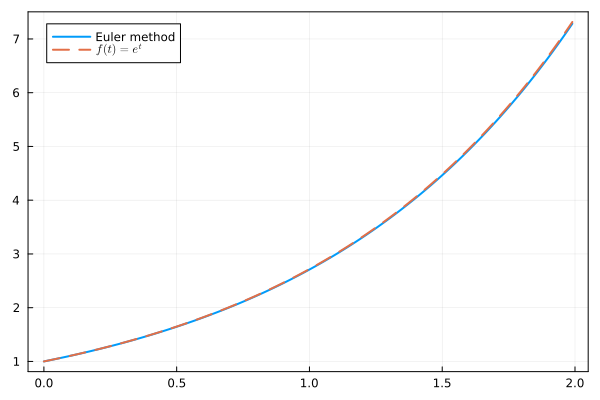

In [107]:
plot(tn, xn[1,:], lw = 2, frame = :box, label = "Euler method")#, dpi=300)
plot!(tn, exp.(tn), lw=2, ls = :dash, label = L"f(t) = e^t")
#savefig("euler_method.png")

In [94]:
isabstracttype(Function)


true